In [1]:
import os
import pickle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def numero(filename):
    return int(filename.split('.')[0].split('_')[-1])-1

In [3]:
folder = "../logs/heatmaps"

In [4]:
filenames = sorted(os.listdir(folder), key=numero)

Шаг 0
module.interactions.1.conv.lin2.weight (256, 128)


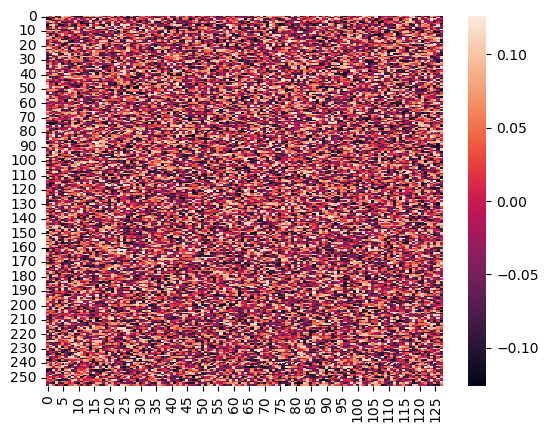

Шаг 50
module.interactions.1.conv.lin2.weight (256, 128)


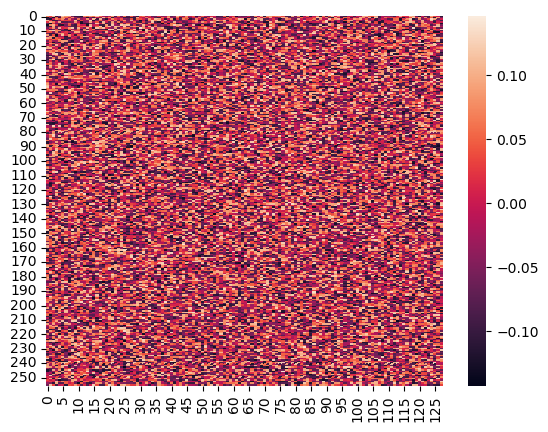

Шаг 100
module.interactions.1.conv.lin2.weight (256, 128)


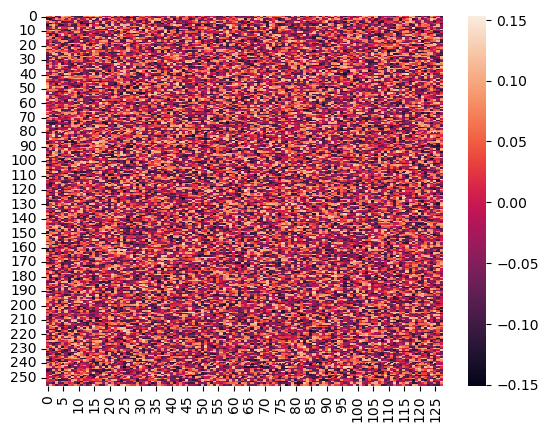

Шаг 150
module.interactions.1.conv.lin2.weight (256, 128)


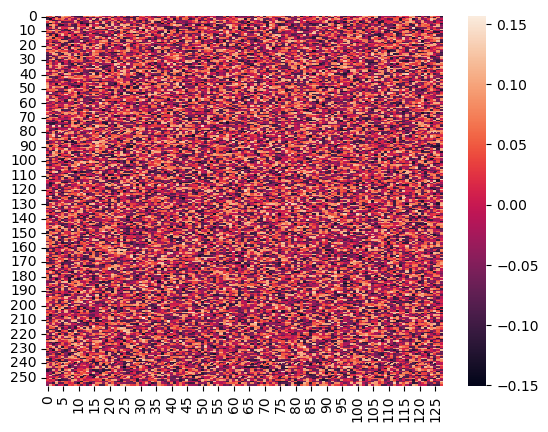

In [7]:
for filename in filenames:
    step_number = numero(filename)
    if step_number%50 == 0:
        print(f"Шаг {step_number}")
        with open(folder + "/" + filename, 'rb') as  f:
            step = pickle.load(f)
        for name, weights in step:
            if name == "module.interactions.1.conv.lin2.weight":
                weights = weights.detach().numpy()
                print(name, weights.shape)
                try:
                    #plt.imshow(weights, cmap='hot', interpolation='nearest')
                    ax = sns.heatmap(weights)
                    plt.show()
                except:
                    print("No heatmap")